## Assignment - 3
### Crime Investigators

- **Importing required libraires**

In [1]:
import pyspark 
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField,StringType,IntegerType,DateType,BooleanType,DoubleType,TimestampType
import pyspark.sql.functions as F
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import seaborn as sns

**1. Create a Spark session**

In [2]:
spark = SparkSession.builder.appName('hw3').getOrCreate()

**2.Define the schema for loading the Chicago crime dataset (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data).**

In [3]:
schema = StructType([StructField("ID", StringType(), True),
                            StructField("CaseNumber", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("PrimaryType", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("LocationDescription", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("CommunityArea", StringType(), True),
                            StructField("FBICode", StringType(), True ),
                            StructField("XCoordinate", DoubleType(), True),
                            StructField("YCoordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("UpdatedOn", StringType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])

**3. Load the Chicago crime data (you should get more than a million rows.**

In [4]:
df = spark.read.format("csv").option("header", True).schema(schema).load("Crimes_-_2001_to_Present.csv")

In [5]:
df.show(5)

+--------+----------+--------------------+--------------------+----+-----------+--------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+--------------------+------------+-------------+--------------------+
|      ID|CaseNumber|                Date|               Block|IUCR|PrimaryType|         Description|LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|XCoordinate|YCoordinate|Year|           UpdatedOn|    Latitude|    Longitude|            Location|
+--------+----------+--------------------+--------------------+----+-----------+--------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+--------------------+------------+-------------+--------------------+
|10224738|  HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|    BATTERY|DOMESTIC BATTERY ...|          RESIDENCE| false|    true|0924|     009|  12|           61

In [6]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- CaseNumber: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- PrimaryType: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- CommunityArea: string (nullable = true)
 |-- FBICode: string (nullable = true)
 |-- XCoordinate: double (nullable = true)
 |-- YCoordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- UpdatedOn: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [7]:
print(f"Length of rows and cols : {((df.count()),len(df.columns))}")

Length of rows and cols : (7760248, 22)


**4. Clean the data:**

**Remove all null values.**

In [8]:
df = df.na.drop()

In [9]:
print(f"Length of rows and cols : {((df.count()),len(df.columns))}")

Length of rows and cols : (7061244, 22)


**Change 'Date' column data type**

In [10]:
df= df.withColumn("Date", to_timestamp(df.Date, "MM/dd/yyyy hh:mm:ss a"))

In [11]:
df.limit(10).toPandas().head()

/usr/local/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,Ward,CommunityArea,FBICode,XCoordinate,YCoordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
3,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
4,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21,71,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"


In [12]:
print(f"Length of rows and cols : {((df.count()),len(df.columns))}")

Length of rows and cols : (7061244, 22)


**5. Filter the data for last ten years.**

In [13]:
df=df.filter((df['Year'] >=2013))

In [14]:
df.limit(10).toPandas().head()

/usr/local/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,Ward,CommunityArea,FBICode,XCoordinate,YCoordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
3,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
4,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21,71,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"


In [15]:
print(f"Length of rows and cols : {((df.count()),len(df.columns))}")

Length of rows and cols : (2580852, 22)


**6. Remove all the records with the following crime types:**
- 'NON-CRIMINAL (SUBJECT SPECIFIED)'
- 'OTHER OFFENSE'
- 'STALKING'
- 'NON - CRIMINAL'
- 'ARSON'

In [16]:
df=df.filter((df['PrimaryType']!='NON-CRIMINAL (SUBJECT SPECIFIED)')&
             (df['PrimaryType']!='OTHER OFFENSE')&
             (df['PrimaryType']!='STALKING')&
             (df['PrimaryType']!='NON - CRIMINAL')&
             (df['PrimaryType']!='ARSON'))   

In [17]:
print(f"Length of rows and cols : {((df.count()),len(df.columns))}")

Length of rows and cols : (2410520, 22)


**7. Merge the similar crime types.**
- For example, change 'Primary Type' of cases that have 'Primary Type' as ‘SEX OFFENSE’ or ‘PROSTITUTION’ such that they should have the same 'Primary Type'.

In [18]:
df.select('PrimaryType').distinct().show(50,False)

+---------------------------------+
|PrimaryType                      |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|CRIMINAL SEXUAL ASSAULT          |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|HOMICIDE                         |
|PUBLIC INDECENCY                 |
|CRIM SEXUAL ASSAULT              |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|PROSTITUTION                     |
|DECEPTIVE PRACTICE               |
|CONCEALED CARRY LICENSE VIOLATION|
|SEX OFFENSE                      |
|CRIMINAL DAMAGE                  |
|NARCOTICS                        |
|NON-CRIMINAL                     |
|KIDNAPPING                 

In [19]:
df = df.withColumn("PrimaryType",when((df["PrimaryType"] == 'CRIM SEXUAL ASSAULT') | (df["PrimaryType"] == 'PROSTITUTION') ,
                                      'SEX OFFENSE').otherwise(df['PrimaryType']))  

df = df.withColumn("PrimaryType",when((df["PrimaryType"] == 'WEAPONS VIOLATION') | (df["PrimaryType"] == 'INTERFERENCE WITH PUBLIC OFFICER') ,
                                      'PUBLIC PEACE VIOLATION').otherwise(df['PrimaryType']))  

df = df.withColumn("PrimaryType",when((df["PrimaryType"] == 'LIQUOR LAW VIOLATION') | (df["PrimaryType"] == 'RITUALISM') | (df["PrimaryType"] == 'GAMBLING'),
                                      'OTHERS').otherwise(df['PrimaryType']))  

df = df.withColumn("PrimaryType",when((df["PrimaryType"] == 'ROBBERY'),'THEFT').otherwise(df['PrimaryType']))  

df = df.withColumn("PrimaryType", when(df["PrimaryType"] == 'OTHER NARCOTIC VIOLATION','NARCOTIC').otherwise(df['PrimaryType']))

In [20]:
df.limit(10).toPandas().head()

/usr/local/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,Ward,CommunityArea,FBICode,XCoordinate,YCoordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
3,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
4,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21,71,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"


In [21]:
print(f"Length of rows and cols : {((df.count()),len(df.columns))}")

Length of rows and cols : (2410520, 22)


**8. Analyze the data and present results:**

**Show year-wise trend of the crime for last ten years.**

In [22]:
df = df.withColumn('Year',year(df.Date))
df.limit(10).toPandas().head()

/usr/local/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,Ward,CommunityArea,FBICode,XCoordinate,YCoordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
3,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
4,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21,71,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"


In [23]:
df_y = df.groupBy('Year').count().sort(desc("count"))
df_y.show(5)

+----+------+
|Year| count|
+----+------+
|2013|287835|
|2014|256127|
|2016|248587|
|2017|246562|
|2018|245308|
+----+------+
only showing top 5 rows



In [24]:
d_y = df_y.toPandas()

Text(0.5, 1.0, 'Trend of crimes for last 10 years')

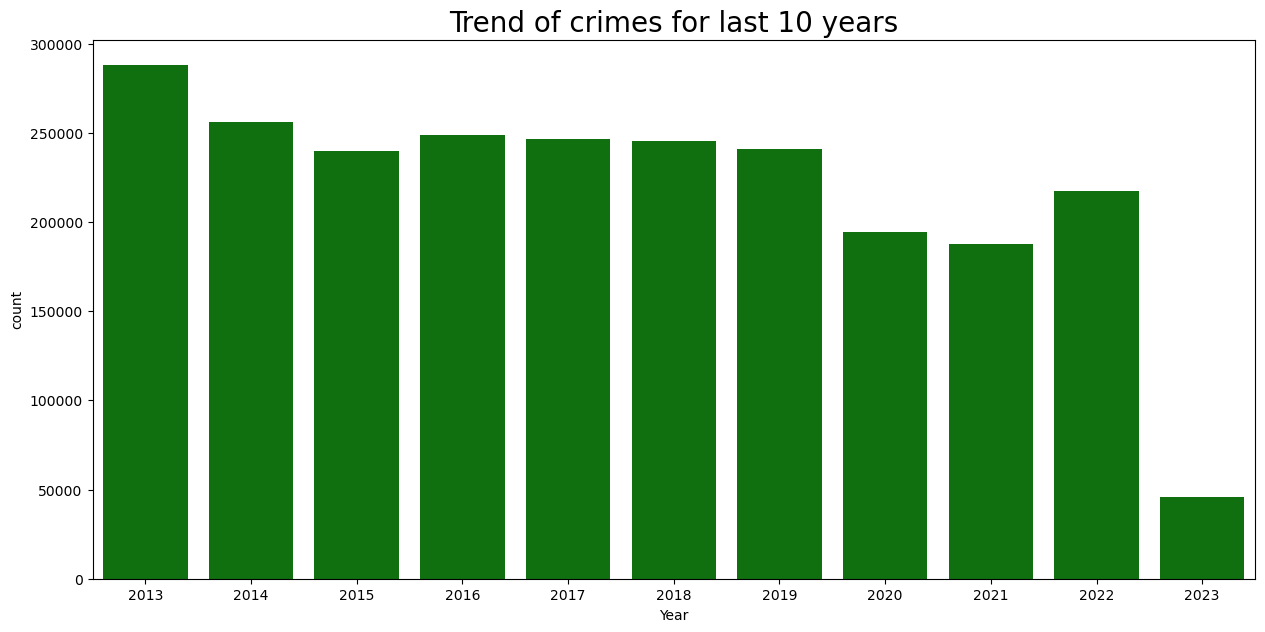

In [35]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Year',y = 'count',data = d_y,color= "Green")
plt.title("Trend of crimes for last 10 years", size = 20)

**Find out at which hour of the day crime is highest.**

In [26]:
df = df.withColumn('Hour',hour(df.Date))
df.limit(10).toPandas().head()

/usr/local/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,CommunityArea,FBICode,XCoordinate,YCoordinate,Year,UpdatedOn,Latitude,Longitude,Location,Hour
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",13
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",11
2,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",12
3,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",13
4,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,71,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",10


In [27]:
df_h = df.groupBy('Hour').count().sort(desc("count"))
df_h.show(1)

+----+------+
|Hour| count|
+----+------+
|  12|139909|
+----+------+
only showing top 1 row



- Hour "12" has highest crime rate

In [28]:
d_h = df_h.toPandas()

Text(0.5, 1.0, 'Most crime happend Hour')

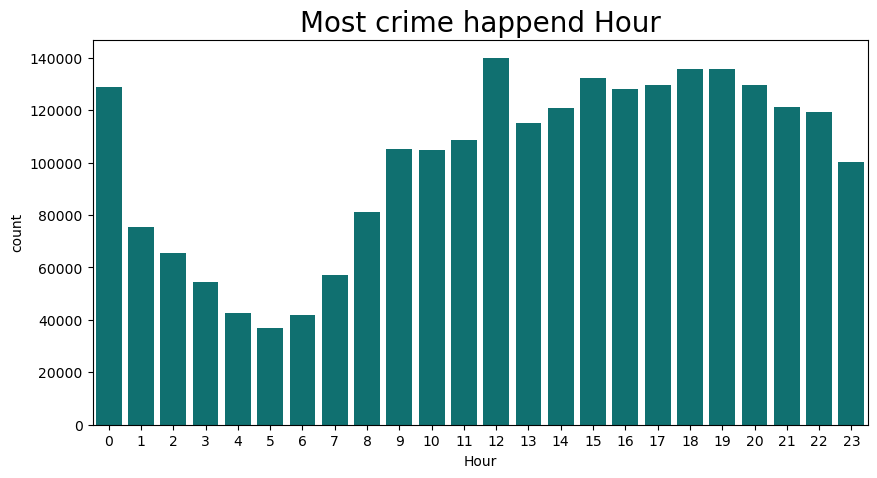

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Hour',y = 'count',data = d_h,color= "Teal")
plt.title("Most crime happend Hour", size = 20)

**Find top ten crimes and present them as a bar chart**

In [30]:
df_t = df.groupBy('PrimaryType').count().sort(desc("count"))
df_t.show(5)

+------------------+------+
|       PrimaryType| count|
+------------------+------+
|             THEFT|681868|
|           BATTERY|481301|
|   CRIMINAL DAMAGE|283407|
|           ASSAULT|194022|
|DECEPTIVE PRACTICE|158871|
+------------------+------+
only showing top 5 rows



In [31]:
d_t = df_t.toPandas()

In [32]:
d_t = d_t.head(10)

Text(0.5, 1.0, 'Top 10 Crime types')

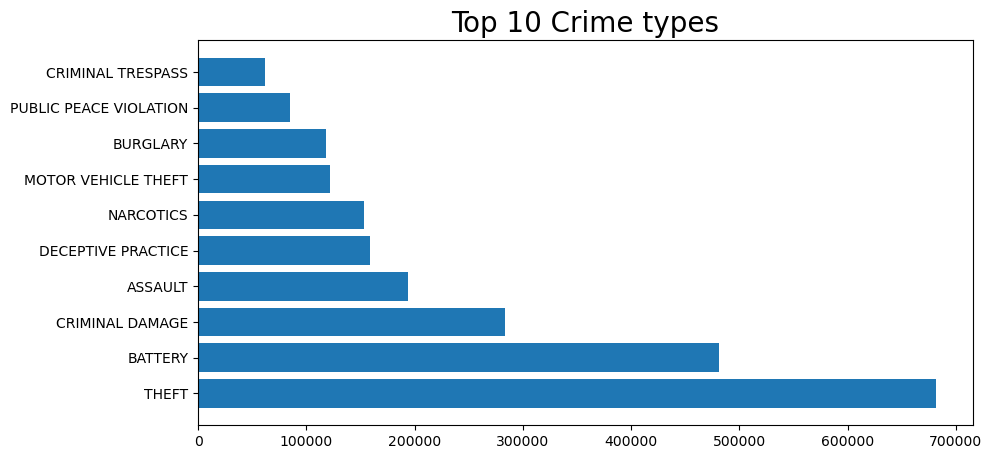

In [36]:
plt.figure(figsize=(10,5))
#sns.barplot(x = 'PrimaryType',y = 'count',data = d_t,color= "Blue")
plt.barh(d_t['PrimaryType'],d_t['count'])
plt.title("Top 10 Crime types", size = 20)